### Date: 2023-10-29
### Author: Jennifer Fortuny I Zhan
### Content: Project 2 Classification, Classification Trees

In this analysis, we use a Classification Tree model to categorize individualse based on their income levels, specifically whether their income exceeds $50K. We focus on minimizing false negatives by applying cost-sensitive learning thorugh class weighrs.

Overall workflow:
1. Loading the pre-processed training and test datasets.
2. Initialzing the Decision Tree Classifier object with initial class weights
3. Fit the classifer to the training data
4. Change the class weights to give higher importance to the minority class (income >$50K) to reduce false negatives.
5. Fit the model again using the adjusted class weights.
6. Use the test data to evaluate the model's performance, focusing on the confusion matrix and accuracy.
7. Further adjust the class weights and refit the model through iteration.

In [43]:
# Imported the required libraries and modules
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
# Loading the csv files
dependent_test_df = pd.read_csv("../2023-10-05_jennifer_data_preparation/dependent_test.csv")
dependent_train_df = pd.read_csv("../2023-10-05_jennifer_data_preparation/dependent_train.csv")
independent_test_df = pd.read_csv("../2023-10-05_jennifer_data_preparation/independent_test.csv")
independent_train_df = pd.read_csv("../2023-10-05_jennifer_data_preparation/independent_train.csv")

In [21]:
# Flatten dependent variables to 1D array
dependent_train = np.ravel(dependent_train_df)
dependent_test = np.ravel(dependent_test_df)

# Create a cost matrix
# Giving a higher weight to class 1 to reduce false negatives
class_weights = {0: 1, 1: 7}

classifier = DecisionTreeClassifier(
    random_state=42,
    class_weight=class_weights)

classifier.fit(independent_train_df, dependent_train)

# Predictions
predictions = classifier.predict(independent_test_df)

# Evaluateion
conf_matrix = confusion_matrix(dependent_test, predictions)
accuracy = accuracy_score(dependent_test, predictions)

# Print results
print(f'Accuracy for Classification Tree model: {accuracy:.3f}')
print('Confusion Matrix: ')
print(conf_matrix)

Accuracy for Classification Tree model: 0.703
Confusion Matrix: 
[[38  6]
 [13  7]]


Using class weights at :class_weights = {0: 1, 1: 7}, the Classification Tree model achieved an accuracy of 70.3. 

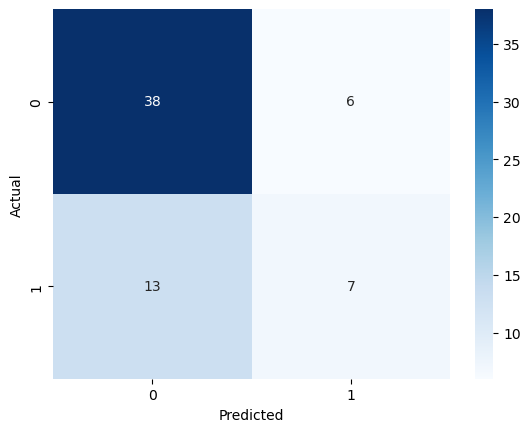

In [38]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

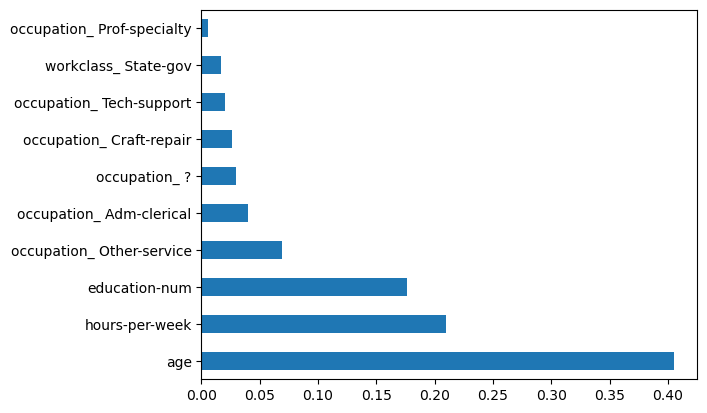

In [40]:
# Make sure the model is fitted
try:
    classifier.fit(independent_train_df, dependent_train)
except Exception as e:
    print(f"An error occurred while fitting the model: {e}")

# Try to plot feature importance
try:
    feature_importance = pd.Series(classifier.feature_importances_, index=independent_train_df.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.show()
except Exception as e:
    print(f"An error occurred while plotting feature importance: {e}")


From the classification tree model, it seems like age is the most important feature, with a significance of 0.35-0.40. Age is a strong predictor in classifying individuals based on whether their income exceeds $50K.

<function matplotlib.pyplot.show(close=None, block=None)>

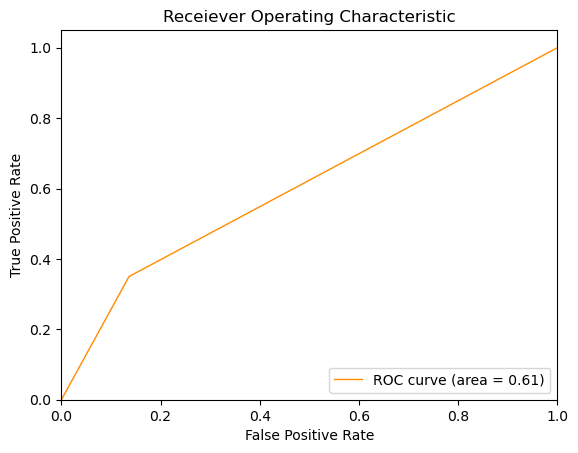

In [44]:
# ROC curve to understand the trade-off between:
# the true positive rate and the false positive rate

fpr, tpr, _ = roc_curve(dependent_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiever Operating Characteristic')
plt.legend(loc="lower right")
plt.show

The ROC curve with an AUC of 0.61 suggests that this Classification Tree model has some predictive power, but it is not highly effective at distinguishing between the two income classes.